In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import scipy as sp
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df['brand']= df['name'].str.split().str[0]
df= df.drop("name", axis = 1)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [5]:
# dealing with outliers

<Axes: ylabel='selling_price'>

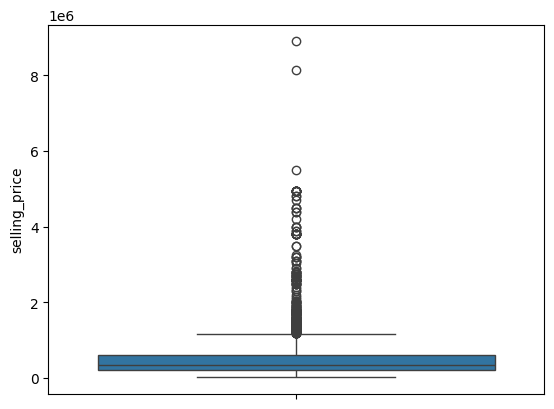

In [6]:
sns.boxplot(y = df["selling_price"])

In [7]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   brand          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340,4340,4340
mean,2013,504127,66216
std,4,578549,46644
min,1992,20000,1
25%,2011,208750,35000
50%,2014,350000,60000
75%,2016,600000,90000
max,2020,8900000,806599


In [9]:
df= df[df["selling_price"] < 8000000].copy()
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


<Axes: ylabel='selling_price'>

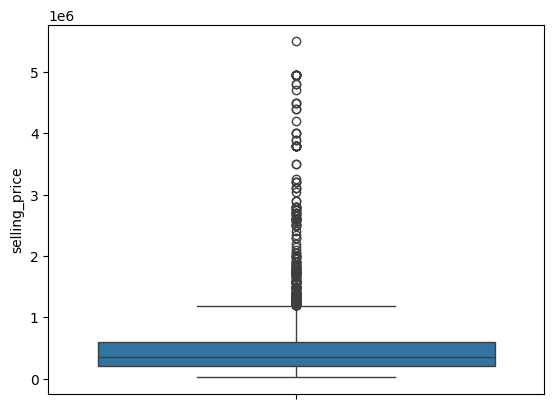

In [10]:
sns.boxplot(y = df["selling_price"])

In [11]:
df= df[df["selling_price"] < 5000000].copy()
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


<Axes: ylabel='km_driven'>

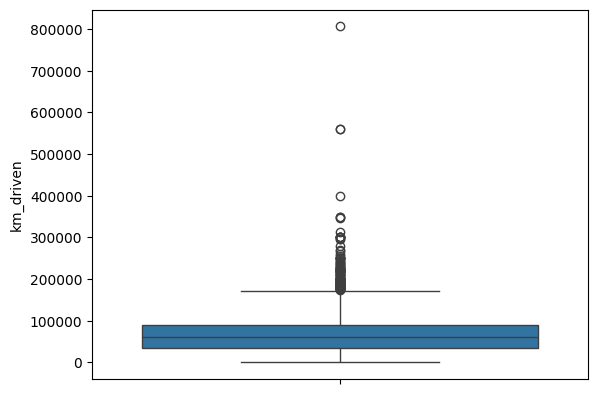

In [12]:
sns.boxplot(y = df["km_driven"])

In [13]:
df= df[df["km_driven"] < 320000].copy()
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


<Axes: ylabel='year'>

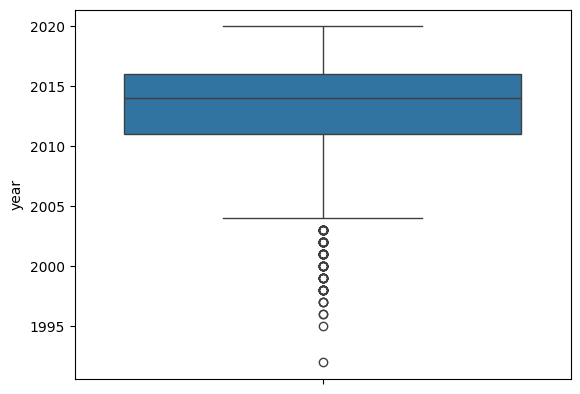

In [14]:
sns.boxplot(y = df["year"])

In [15]:
df= df[df["year"] > 1995].copy()


<Axes: xlabel='km_driven', ylabel='selling_price'>

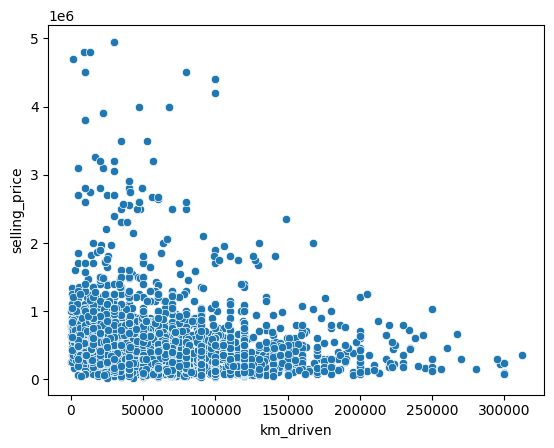

In [16]:
sns.scatterplot(x= df["km_driven"], y= df["selling_price"], data= df)

<Axes: xlabel='year', ylabel='selling_price'>

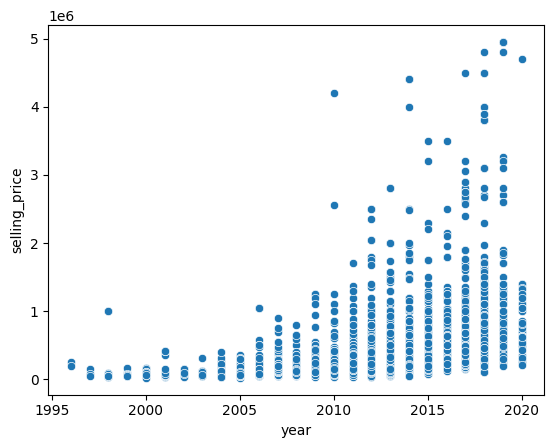

In [17]:
sns.scatterplot(x= df["year"], y= df["selling_price"], data= df)

In [18]:
df['selling_price_log'] = np.log1p(df['selling_price'])
df.min()

year                        1996
selling_price              20000
km_driven                      1
fuel                         CNG
seller_type               Dealer
transmission           Automatic
owner                First Owner
brand                 Ambassador
selling_price_log             10
dtype: object

<Axes: xlabel='selling_price', ylabel='Count'>

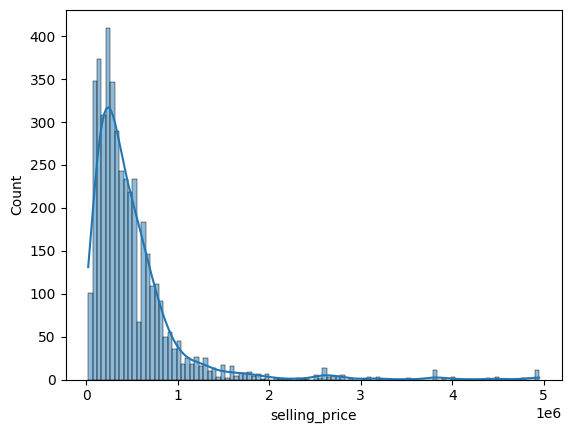

In [19]:
sns.histplot(df["selling_price"], kde=True)


<Axes: xlabel='selling_price_log', ylabel='Count'>

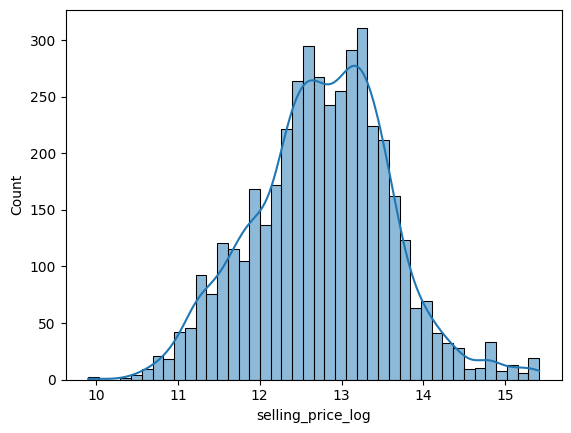

In [20]:
sns.histplot(df["selling_price_log"], kde=True)


In [21]:
df= df.drop("selling_price", axis = 1)

In [22]:
df

,year,km_driven,fuel,seller_type,transmission,owner,brand,selling_price_log
0,2007,70000,Petrol,Individual,Manual,First Owner,Maruti,11
1,2007,50000,Petrol,Individual,Manual,First Owner,Maruti,12
2,2012,100000,Diesel,Individual,Manual,First Owner,Hyundai,13
3,2017,46000,Petrol,Individual,Manual,First Owner,Datsun,12
4,2014,141000,Diesel,Individual,Manual,Second Owner,Honda,13
...,...,...,...,...,...,...,...,...
4335,2014,80000,Diesel,Individual,Manual,Second Owner,Hyundai,13
4336,2014,80000,Diesel,Individual,Manual,Second Owner,Hyundai,13
4337,2009,83000,Petrol,Individual,Manual,Second Owner,Maruti,12
4338,2016,90000,Diesel,Individual,Manual,First Owner,Hyundai,14


In [23]:
df = pd.get_dummies(df, drop_first=True)

In [24]:
df

,year,km_driven,selling_price_log,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,70000,11,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2007,50000,12,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2012,100000,13,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2017,46000,12,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2014,141000,13,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,13,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4336,2014,80000,13,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4337,2009,83000,12,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4338,2016,90000,14,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [25]:
df= df.astype(int)

In [26]:
df

,year,km_driven,selling_price_log,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,70000,11,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,50000,11,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,100000,13,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,46000,12,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,141000,13,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,12,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4336,2014,80000,12,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,2009,83000,11,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,2016,90000,13,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X= df.drop("selling_price_log", axis= 1)
y= df["selling_price_log"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
scaler= StandardScaler()

In [30]:
X_train_scaled= scaler.fit_transform(X_train)

In [31]:
X_test_scaled= scaler.transform(X_test)

In [32]:
model= LinearRegression()

In [33]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
y_pred= model.predict(X_test_scaled)

In [35]:
mean_absolute_error(y_test, y_pred)

0.3668982532605119

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(0.4618460215135047)

In [37]:
r2_score(y_test, y_pred)

0.7267967720577594

In [38]:
# test_residuals = y_test - y_pred
# fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# _ = sp.stats.probplot(test_residuals,plot=ax)

In [39]:
# poly = PolynomialFeatures(degree=4, include_bias=True)
# poly_features= poly.fit_transform(X)

In [40]:
 # X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [41]:
# model= LinearRegression()

In [42]:
# model.fit(X_train, y_train)

LinearRegression()

In [43]:
# y_pred= model.predict(X_test)

In [44]:
# mean_absolute_error(y_test, y_pred)

0.441704159378517

In [45]:
# np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(0.9681774202978186)

In [46]:
# r2_score(y_test, y_pred)

-0.20060821984035115

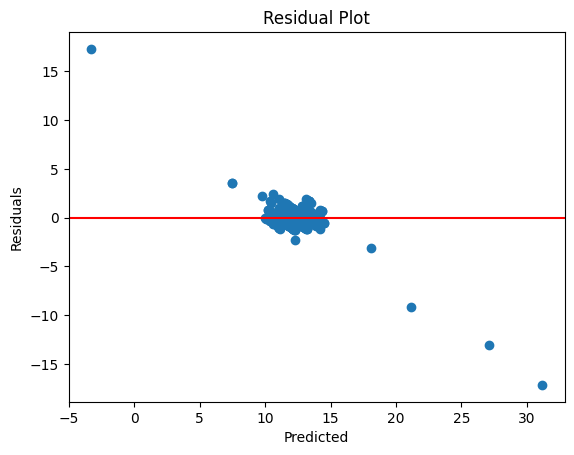

In [47]:
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r')
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

In [48]:
# Ridge lasso

In [49]:
X= df.drop("selling_price_log", axis= 1)
y= df["selling_price_log"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
scaler = StandardScaler()

In [53]:
X_train_scaled= scaler.fit_transform(X_train)

In [54]:
X_test_scaled= scaler.transform(X_test)

In [109]:
model = Ridge(alpha=1)

In [110]:
model.fit(X_train, y_train)

Ridge(alpha=1)

In [111]:
y_pred= model.predict(X_test)

In [112]:
mean_absolute_error(y_test, y_pred)

0.3663695143491769

In [113]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(0.4606535947314604)

In [114]:
r2_score(y_test, y_pred)

0.7282057017723997

In [91]:
# Lasso

In [104]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
print("Lasso Score:", r2_score(y_test, lasso_preds))

Lasso Score: 0.7290295152188702


In [101]:
# Gridsearch

In [105]:
# Lasso
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
model = Lasso()
grid = GridSearchCV(model, {'alpha':alphas}, scoring= 'r2', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [106]:
grid.best_params_

{'alpha': 0.0001}

In [107]:
# Ridge
alphas = [ 0.01, 0.1, 1, 10, 100]
model = Ridge()
grid = GridSearchCV(model, {'alpha':alphas}, scoring= 'r2', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [108]:
grid.best_params_

{'alpha': 1}

In [115]:
# ElasticNet

In [116]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
model = ElasticNet()
grid = GridSearchCV(model, param_grid=param_grid, scoring= 'r2', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='r2')

In [117]:
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [121]:
grid.best_score_

np.float64(0.6852933128262416)

In [123]:
# best Result, almost all the models are giving same results but, we will use polynomial 

In [125]:
poly = PolynomialFeatures(degree=2, include_bias=True)
poly_features= poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
model= LinearRegression()
model.fit(X_train, y_train)
r2_score(y_test, y_pred)

0.7282057017723997

In [128]:
# deployment
final_model = LinearRegression()
final_poly_converter = PolynomialFeatures(degree=2, include_bias= False)
Full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(Full_converted_X,y)

LinearRegression()

In [129]:
from joblib import dump,load
dump(final_model, 'final_poly_model.joblib')
dump(final_poly_converter, 'final_converter.joblib')
loaded_converter = load('final_converter.joblib')
loaded_model = load('final_poly_model.joblib')

In [130]:
# Ready to use